# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import levene
from scipy.stats import ttest_ind
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


# Question 1
## Is the distribution of body temperature normal?

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def plot_ecdf(data, column):
    '''Plots an ecdf of a dataset for the selected column'''
    sns.set()
    x, y = ecdf(data[column])
    
    mean = np.mean(data[column])
    std = np.std(data[column])
    samples = np.random.normal(mean, std, size=10000)
    x_theor, y_theor = ecdf(samples)
    
    _ = plt.plot(x_theor, y_theor)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.xlabel(column)
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()

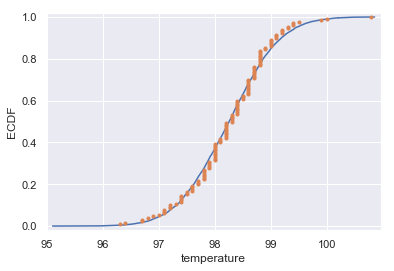

In [5]:
plot_ecdf(df, 'temperature')

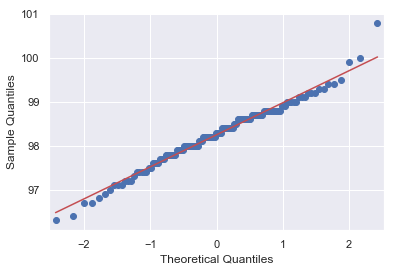

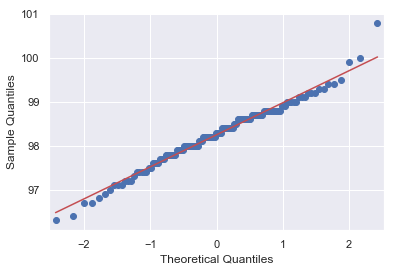

In [6]:
qqplot(df['temperature'], line='s')

In [7]:
stat, p = shapiro(df['temperature'])
print(stat, p)

0.9865769743919373 0.2331680953502655


## Answer
#### Based on the ECDF, QQ Plot, and Shapiro-Wilk test the body temperature data appears to be *normally distributed*.
#### I use the Shapiro-Wilk test because the sample size is small (<1000 observations).
#### The p-value of 0.23 means that we can not reject the null hypothesis that the distribution is normal.

****
# Question 2
## Is the sample size large? Are the observations independent? 

In [8]:
len(df)

130

## Answer
#### The sample size is 130 which is larger than the requirement of 30 so it meets this condition.
#### Each row is a separate individual so the values are independent of each other.

****
# Question 3
## Is the true population mean really 98.6 degrees F?

In [9]:
print(np.mean(df['temperature']))

98.24923076923078


In [10]:
temp = df['temperature']

In [21]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

temp_shifted = temp - np.mean(temp) + 98.6

def t_statistic(data, agreed_value=98.6):
    return (np.mean(data) - agreed_value) / (np.std(data) / np.sqrt(len(data)))

t_observed = t_statistic(temp)

bs_replicates = draw_bs_reps(temp_shifted, t_statistic, 10000)

p_value = np.sum(np.abs(bs_replicates) >= np.abs(t_observed)) / 10000

print(p_value)

0.0


#### The p-value of 0.0 suggests that out of 10,000 trials, no trials had a t-statistic at least as large as the observed t-statistic. We can reject the null hypothesis that the true population mean is really 98.6 degrees F.

#### If we are to do a frequentist statistical test we should use the one sample t-test in this situation because we have one sample data set and a theoretical population mean to compare it to. 
#### The t statistic is appropriate because we do not have information about the population and have to estimate the population standard deviation.

In [12]:
t, p = ttest_1samp(temp, 98.6)

In [30]:
print('t-statistic =', t, '\n', 'p-value =', p)

t-statistic = -5.4548232923645195 
 p-value = 2.4106320415561276e-07


#### Try a one sample test using the z-statistic to see the difference.

In [32]:
z, p = ztest(temp, x2=None, value=98.6)

In [33]:
print('z-statistic =', z, '\n', 'p-value =', p)

z-statistic = -5.4548232923645195 
 p-value = 4.9021570141012155e-08


#### The results of the tests using the t-statistic and z-statistic are very similar because the sample size is large enough that the sample standard deviation approaches the population standard deviation.

## Answer
#### Based on the bootstrap hypothesis test as well as the frequenstist approaches, it appears that the true population mean is not equal to 98.6 degrees F.

****
# Question 4
## Repeat both frequentist tests with a sample size of 10.

In [34]:
sample = np.random.choice(temp, size=10)

In [35]:
t, p = ttest_1samp(sample, 98.6)

In [36]:
print('t-statistic =', t, '\n', 'p-value =', p)

t-statistic = -2.2901101101358905 
 p-value = 0.04776605011030599


In [37]:
z, p = ztest(sample, x2=None, value=98.6)

In [38]:
print('z-statistic =', z, '\n', 'p-value =', p)

z-statistic = -2.2901101101358905 
 p-value = 0.022014934443674666


## Answer
#### The p-value for the t-test is higher because the estimated population standard deviation will always be larger than the sample standard deviation, whereas the z-test assumes that the population standard deviation is equal to the sample standard deviation. Because the sample size is small (n=10) it is likely that the sample standard deviation differs from the population, and so the t-test should be used.

****
# Question 5
## At what temperature should we consider someone's temperature to be "abnormal"? 
#### Bootstrap approach

In [39]:
mean_replicates = np.empty(10000)
for i in range(10000):
    mean_replicates[i] = bootstrap_replicate_1d(temp, np.mean)

In [41]:
conf_int = np.percentile(mean_replicates, [2.5, 97.5])
print(conf_int)

[98.12459615 98.37615385]


#### Frequentist approach

In [43]:
sem = np.std(temp) / np.sqrt(len(temp))
upper_bound = np.mean(temp) + (sem*1.96)
lower_bound = np.mean(temp) - (sem*1.96)
print(lower_bound, upper_bound)

98.12367980442819 98.37478173403336


## Answer
#### Based on the bootstrap and frequestist approaches, it appears that a body temperature should be considered abnormal if it is less than 98.12 or greater than 98.37.

****
# Question 6
## Is there a significant difference between males and females in normal temperature?

In [45]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [61]:
males = df.loc[df.gender == 'M', 'temperature']
females = df.loc[df.gender == 'F', 'temperature']
print('Average male temp:', np.mean(males), '\nAverage female temp:', np.mean(females))

Average male temp: 98.1046153846154 
Average female temp: 98.39384615384613


In [56]:
levene(males, females, center='mean')

LeveneResult(statistic=0.06111812694510252, pvalue=0.8051334389753846)

#### Based on the Levene test for equal variance, we can not reject the null hypothesis that variances of the two samples are equal. Therefor we can assume equal variance when conducting an independent t-test.

In [58]:
ttest_ind(males, females)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

### Answer
#### I chose to use an independent samples t-test because we have two samples for which we would like to compare means. If the null hypothesis is true we can assume that males and females come from a single population in terms of body temperature. However, if we reject the null hypothesis we can assume that males and females come from two distinct populations in terms of body temperature, and therefore should be considered seperately when assessing body temperature.
#### Because the p-value is less that 0.05 we can reject the null hypothesis that males and females have an identical average normal body temperature.
#### Because males and females have different average body temperatures, we should calculate the confidence intervale seperately for each.


In [62]:
male_replicates = np.empty(10000)
for i in range(10000):
    male_replicates[i] = bootstrap_replicate_1d(males, np.mean)

m_conf_int = np.percentile(male_replicates, [2.5, 97.5])
print('Male confidence interval:', m_conf_int)

female_replicates = np.empty(10000)
for i in range(10000):
    female_replicates[i] = bootstrap_replicate_1d(females, np.mean)

f_conf_int = np.percentile(female_replicates, [2.5, 97.5])
print('Female confidence interval:', f_conf_int)

Male confidence interval: [97.93692308 98.27230769]
Female confidence interval: [98.21384615 98.57692308]


#### When determining whether someone's body temperature is 'abnormal' we should consider the gender of the individual.
#### A male body temperature should be considered normal between 97.94 and 98.27.
#### A female body temperature should be considered normal between 98.21 and 98.58.